In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    'Peach/Train',  # change this path according to your directory
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode='sparse'
)

Found 3566 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip= True,
    rotation_range=10
)

val_generator = val_datagen.flow_from_directory(
    'Peach/Val',    # change this path according to your directory
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode='sparse'
)

Found 801 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip= True,
    rotation_range=10
)

test_generator = val_datagen.flow_from_directory(
    'Peach/Test',   # change this path according to your directory
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode='sparse'
)

Found 90 images belonging to 2 classes.


In [43]:
class_names = list(train_generator.class_indices.keys())
class_names

['Bacterial Spot', 'Healthy']

In [44]:
for image_batch, label_batch in train_generator:
    print(image_batch[0].shape)
    print(label_batch)
    break

(256, 256, 3)
[0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 1.]


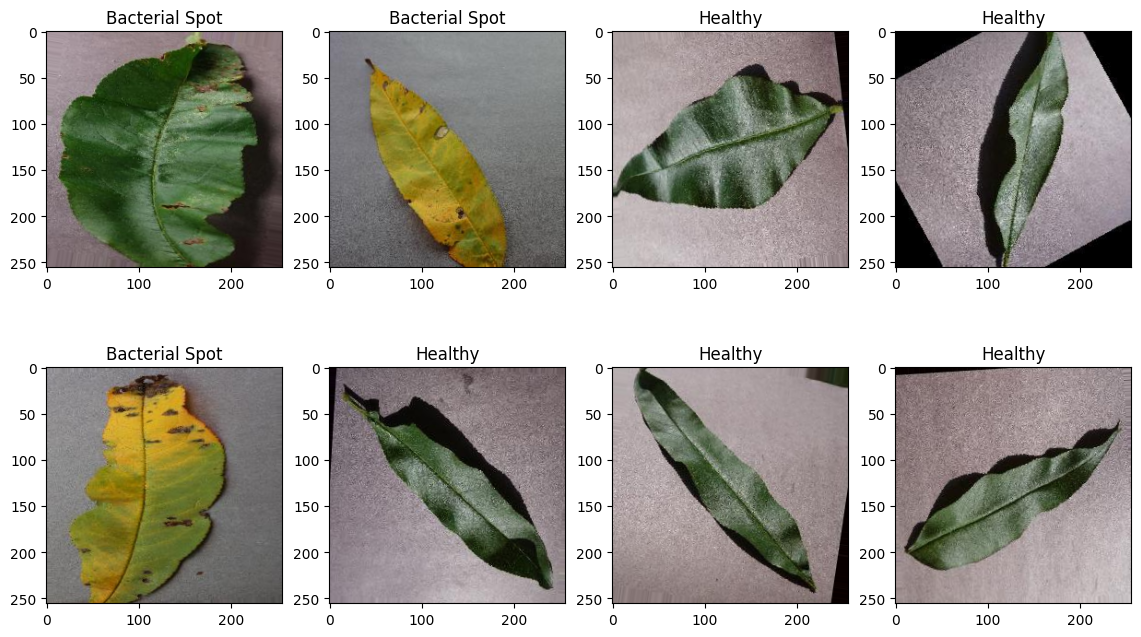

In [45]:
plt.figure(figsize=(14, 8))
for image_batch, label_batch in train_generator:
    for i in range(8):
        ax = plt.subplot(2, 4, i+1)
        plt.imshow(image_batch[i])
        plt.title(class_names[int(label_batch[i])])

    break

In [46]:
CHANNELS = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 2

In [47]:
model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)      

In [49]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']   
)

In [50]:
train_generator.samples

3566

In [52]:
3566/32

111.4375

In [53]:
val_generator.samples

801

In [54]:
801/32

25.03125

In [55]:
history = model.fit(
    train_generator,
    steps_per_epoch=111,
    validation_data=val_generator,
    validation_steps=25,
    verbose=1,
    epochs=10
)

Epoch 1/10
111/111 [==============================] - 92s 816ms/step - loss: 0.3734 - accuracy: 0.8087 - val_loss: 0.1235 - val_accuracy: 0.9638
Epoch 2/10
111/111 [==============================] - 89s 800ms/step - loss: 0.1094 - accuracy: 0.9612 - val_loss: 0.1255 - val_accuracy: 0.9550
Epoch 3/10
111/111 [==============================] - 83s 751ms/step - loss: 0.0963 - accuracy: 0.9660 - val_loss: 0.0712 - val_accuracy: 0.9762
Epoch 4/10
111/111 [==============================] - 86s 770ms/step - loss: 0.0716 - accuracy: 0.9751 - val_loss: 0.0553 - val_accuracy: 0.9850
Epoch 5/10
111/111 [==============================] - 86s 769ms/step - loss: 0.0756 - accuracy: 0.9728 - val_loss: 0.0602 - val_accuracy: 0.9800
Epoch 6/10
111/111 [==============================] - 86s 771ms/step - loss: 0.0481 - accuracy: 0.9842 - val_loss: 0.0435 - val_accuracy: 0.9862
Epoch 7/10
111/111 [==============================] - 87s 780ms/step - loss: 0.0524 - accuracy: 0.9816 - val_loss: 0.0677 - val_ac

In [56]:
scores = model.evaluate(test_generator)
scores

3/3 [==============================] - 3s 912ms/step - loss: 0.0139 - accuracy: 1.0000


[0.013898404315114021, 1.0]

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

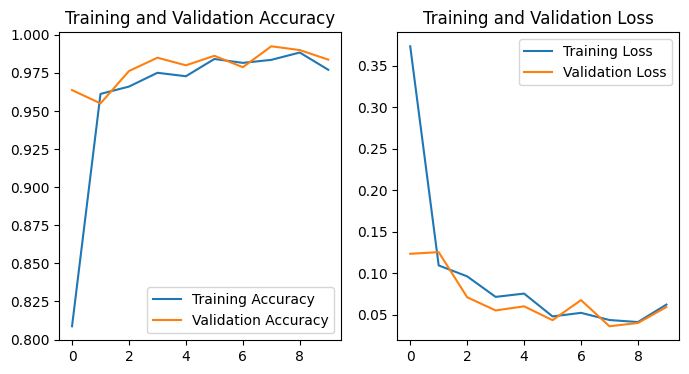

In [59]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First Image to predict
Actual Label:  Healthy
1/1 [==============================] - 0s 273ms/step
Predicted Label:  Healthy


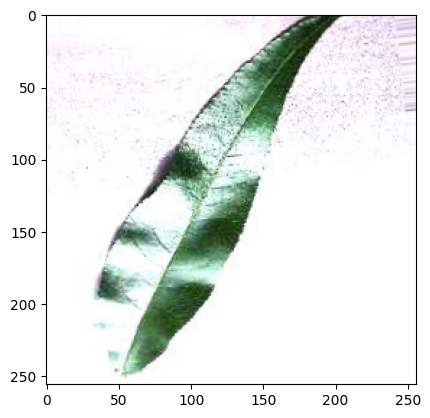

In [60]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    print("First Image to predict")
    plt.imshow(first_image)
    print("Actual Label: ", class_names[first_label])

    batch_predictions = model.predict(image_batch)
    print("Predicted Label: ", class_names[np.argmax(batch_predictions[0])])

    break

In [61]:
model.save('peach_disease.h5')